In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('seaborn')
sns.set_context('notebook')
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_data = pd.read_csv(url)
covid_data.shape

(253, 72)

In [3]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [4]:
covid_data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.00000,253.000000,253.000000,253.000000,253.000000
mean,22.150871,23.264178,2.193676,2.584980,3.719368,5.667984,8.371542,11.569170,22.047431,24.371542,...,1075.237154,1203.146245,1331.830040,1495.000000,1652.351779,1848.43083,2093.245059,2345.023715,2611.486166,2846.312253
std,24.403867,71.507635,27.969762,28.069318,34.941395,48.626864,67.952220,91.552657,224.717242,226.077149,...,5774.340594,6212.525594,6660.129026,7280.529503,7908.340240,8747.74893,9883.865684,11069.654120,12375.144057,13597.994100
min,-41.454500,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,8.538000,-19.020800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,5.000000,6.000000,7.000000,9.00000,12.000000,12.000000,14.000000,16.000000
50%,23.829800,20.902977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,47.000000,53.000000,73.000000,75.000000,84.000000,93.00000,106.000000,110.000000,120.000000,139.000000
75%,41.295600,85.240100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,253.000000,303.000000,326.000000,366.000000,402.000000,456.00000,502.000000,574.000000,641.000000,679.000000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67800.000000,67800.000000,67800.000000,67800.000000,69176.000000,74386.00000,83836.000000,101657.000000,121478.000000,140886.000000


In [5]:
covid_data.rename(columns={'Province/State': 'state', 'Country/Region': 'country', 
                            'Lat': 'lat', 'Long': 'long'}, inplace=True)
covid_data.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


# USA

In [6]:
usa = covid_data.loc[covid_data['country'] == 'US']
usa.drop(['state', 'country', 'lat', 'long'], axis=1, inplace=True)
usa

/Users/Grant/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
225,1,1,2,2,5,5,5,5,5,7,...,19100,25489,33276,43847,53740,65778,83836,101657,121478,140886


In [7]:
usa.values

array([[     1,      1,      2,      2,      5,      5,      5,      5,
             5,      7,      8,      8,     11,     11,     11,     11,
            11,     11,     11,     11,     12,     12,     13,     13,
            13,     13,     13,     13,     13,     13,     15,     15,
            15,     51,     51,     57,     58,     60,     68,     74,
            98,    118,    149,    217,    262,    402,    518,    583,
           959,   1281,   1663,   2179,   2727,   3499,   4632,   6421,
          7783,  13677,  19100,  25489,  33276,  43847,  53740,  65778,
         83836, 101657, 121478, 140886]])

In [8]:
us_counts = np.squeeze(usa.values)
us_counts

array([     1,      1,      2,      2,      5,      5,      5,      5,
            5,      7,      8,      8,     11,     11,     11,     11,
           11,     11,     11,     11,     12,     12,     13,     13,
           13,     13,     13,     13,     13,     13,     15,     15,
           15,     51,     51,     57,     58,     60,     68,     74,
           98,    118,    149,    217,    262,    402,    518,    583,
          959,   1281,   1663,   2179,   2727,   3499,   4632,   6421,
         7783,  13677,  19100,  25489,  33276,  43847,  53740,  65778,
        83836, 101657, 121478, 140886])

# South Korea

In [9]:
sk = covid_data.loc[covid_data['country'] == 'Korea, South']
sk.drop(['state', 'country', 'lat', 'long'], axis=1, inplace=True)
sk

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
143,1,1,2,2,3,4,4,4,4,11,...,8652,8799,8961,8961,9037,9137,9241,9332,9478,9583


In [10]:
sk.values

array([[   1,    1,    2,    2,    3,    4,    4,    4,    4,   11,   12,
          15,   15,   16,   19,   23,   24,   24,   25,   27,   28,   28,
          28,   28,   28,   29,   30,   31,   31,  104,  204,  433,  602,
         833,  977, 1261, 1766, 2337, 3150, 3736, 4335, 5186, 5621, 6088,
        6593, 7041, 7314, 7478, 7513, 7755, 7869, 7979, 8086, 8162, 8236,
        8320, 8413, 8565, 8652, 8799, 8961, 8961, 9037, 9137, 9241, 9332,
        9478, 9583]])

In [11]:
sk_counts = np.squeeze(sk.values)
sk_counts

array([   1,    1,    2,    2,    3,    4,    4,    4,    4,   11,   12,
         15,   15,   16,   19,   23,   24,   24,   25,   27,   28,   28,
         28,   28,   28,   29,   30,   31,   31,  104,  204,  433,  602,
        833,  977, 1261, 1766, 2337, 3150, 3736, 4335, 5186, 5621, 6088,
       6593, 7041, 7314, 7478, 7513, 7755, 7869, 7979, 8086, 8162, 8236,
       8320, 8413, 8565, 8652, 8799, 8961, 8961, 9037, 9137, 9241, 9332,
       9478, 9583])

# Italy

In [12]:
italy = covid_data.loc[covid_data['country'] == 'Italy']
italy.drop(['state', 'country', 'lat', 'long'], axis=1, inplace=True)
italy

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
137,0,0,0,0,0,0,0,0,0,2,...,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689


In [13]:
italy.values

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            2,     2,     2,     2,     2,     2,     2,     3,     3,
            3,     3,     3,     3,     3,     3,     3,     3,     3,
            3,     3,     3,    20,    62,   155,   229,   322,   453,
          655,   888,  1128,  1694,  2036,  2502,  3089,  3858,  4636,
         5883,  7375,  9172, 10149, 12462, 12462, 17660, 21157, 24747,
        27980, 31506, 35713, 41035, 47021, 53578, 59138, 63927, 69176,
        74386, 80589, 86498, 92472, 97689]])

In [14]:
italy_counts = np.squeeze(italy.values)
italy_counts

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           2,     2,     2,     2,     2,     2,     2,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,    20,    62,   155,   229,   322,   453,
         655,   888,  1128,  1694,  2036,  2502,  3089,  3858,  4636,
        5883,  7375,  9172, 10149, 12462, 12462, 17660, 21157, 24747,
       27980, 31506, 35713, 41035, 47021, 53578, 59138, 63927, 69176,
       74386, 80589, 86498, 92472, 97689])

# Plots

In [15]:
columns = usa.columns
x = np.arange(len(columns))
print(x.shape)
print(us_counts.shape)

(68,)
(68,)


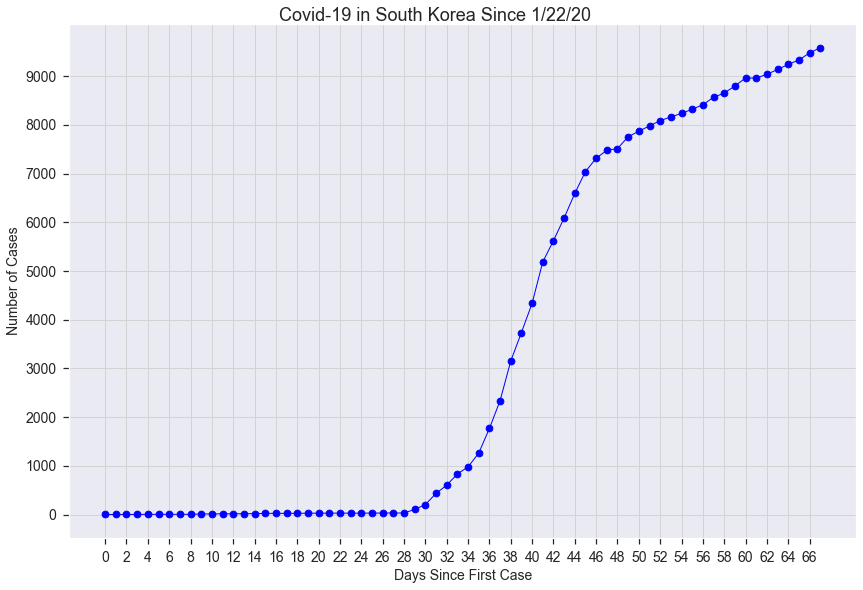

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, sk_counts, color='blue', s=45)
ax.plot(x, sk_counts, color='blue', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 2))
ax.set_yticks(np.arange(0, max(sk_counts), 1000))
plt.tight_layout()
fig.suptitle('Covid-19 in South Korea Since 1/22/20', fontsize=18, va='bottom')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

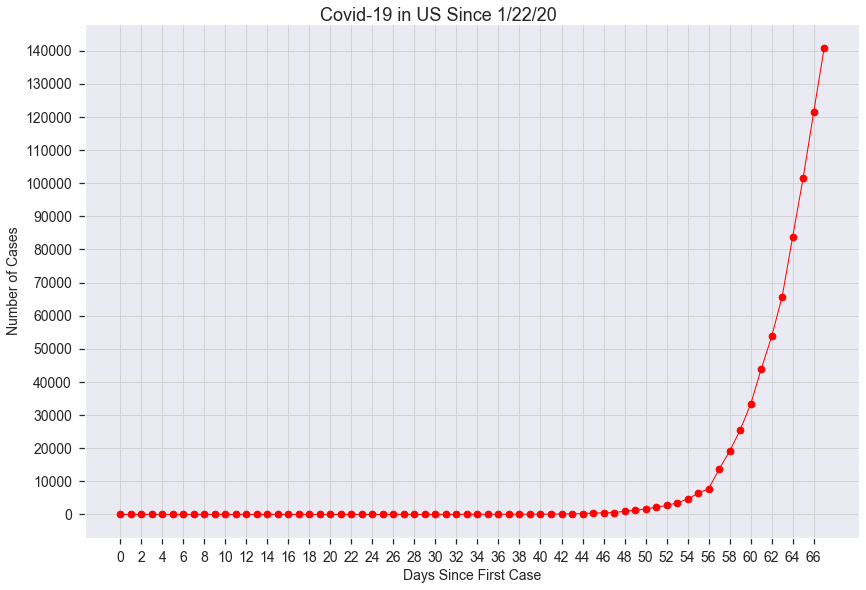

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, us_counts, color='red', s=45)
ax.plot(x, us_counts, color='red', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 2))
ax.set_yticks(np.arange(0, max(us_counts), 10000))
fig.suptitle('Covid-19 in US Since 1/22/20', fontsize=18, va='bottom')
plt.tight_layout()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

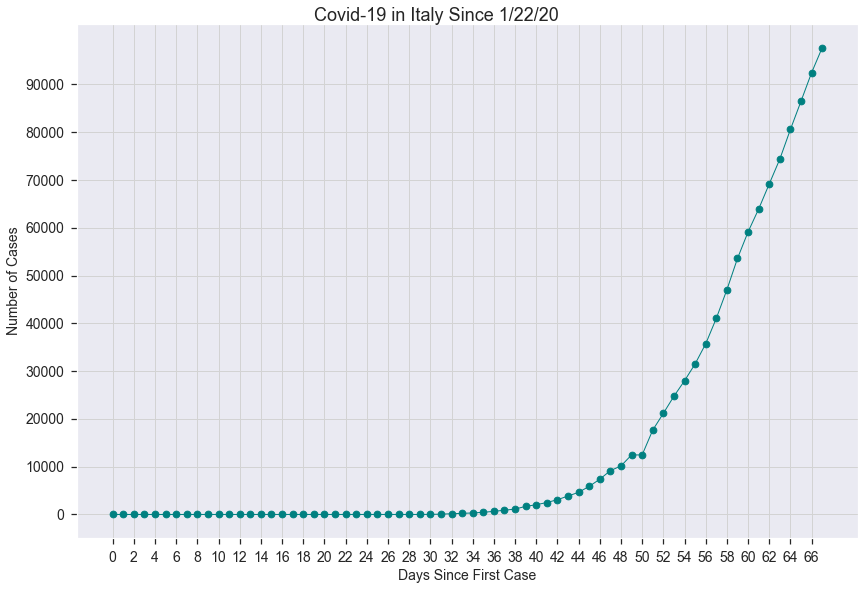

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, italy_counts, color='teal', s=45)
ax.plot(x, italy_counts, color='teal', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 2))
ax.set_yticks(np.arange(min(italy_counts), max(italy_counts), 10000))
plt.tight_layout()
fig.suptitle('Covid-19 in Italy Since 1/22/20', fontsize=18, va='bottom')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

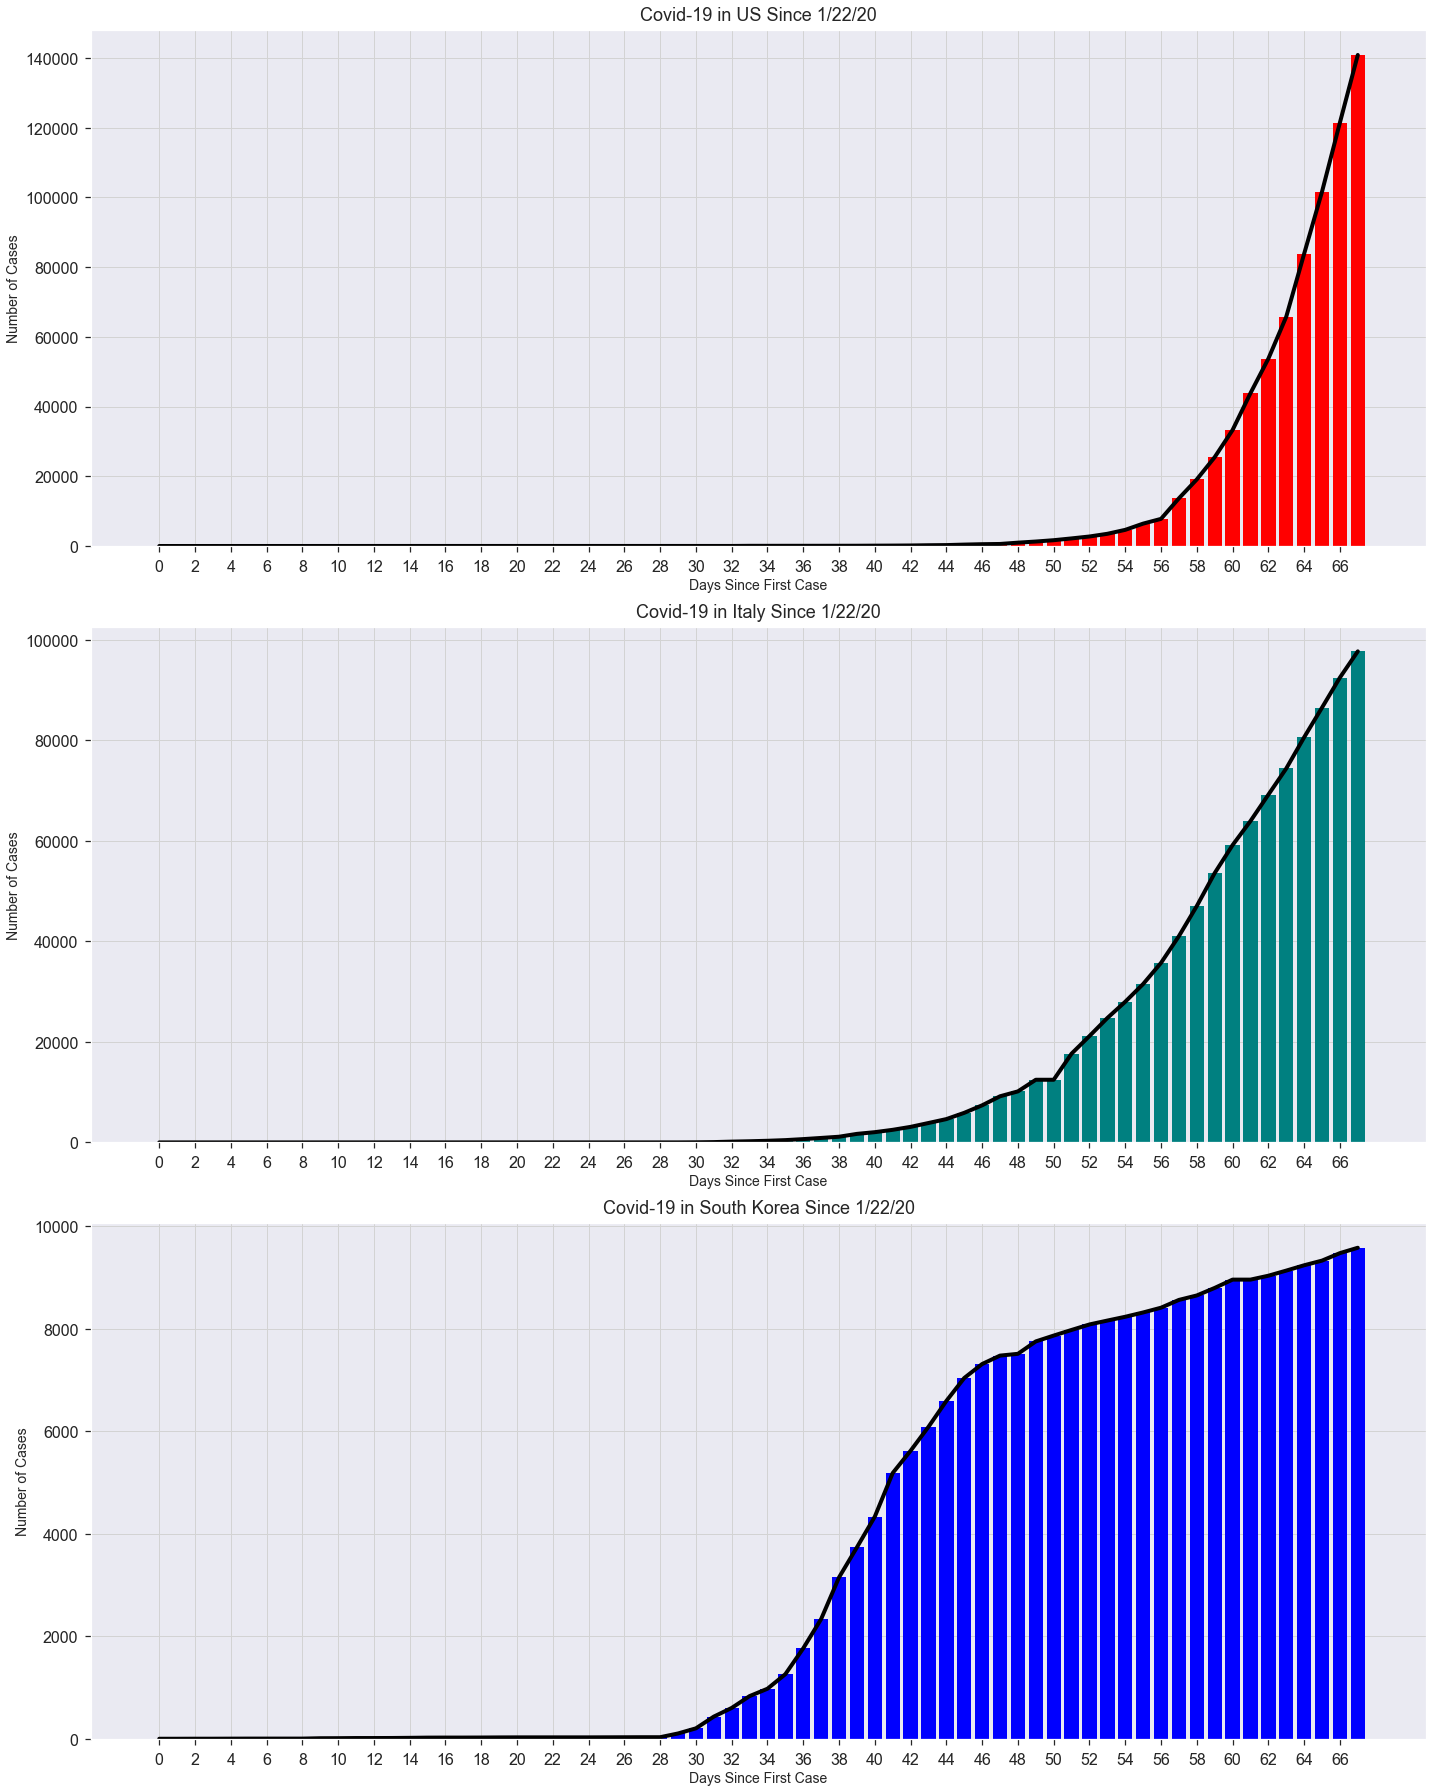

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,25))
axes = [ax1, ax2, ax3]
ax1.plot(x, us_counts, color='black', linewidth=4)
ax2.plot(x, italy_counts, color='black', linewidth=4)
ax3.plot(x, sk_counts, color='black', linewidth=4)
ax1.bar(x, us_counts, color='red')
ax2.bar(x, italy_counts, color='teal')
ax3.bar(x, sk_counts, color='blue')
for ax in axes:
    ax.set_xlabel('Days Since First Case', fontsize=14)
    ax.set_ylabel('Number of Cases', fontsize=14)
    ax.set_xticks(np.arange(min(x), max(x), 2))
    ax.grid(c='lightgrey')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
ax1.set_title('Covid-19 in US Since 1/22/20', fontsize=18, va='bottom')
ax2.set_title('Covid-19 in Italy Since 1/22/20', fontsize=18, va='bottom')
ax3.set_title('Covid-19 in South Korea Since 1/22/20', fontsize=18, va='bottom')
plt.tight_layout()
plt.show()